## Домашнее задание по модулю Python-13 Бочковой Елены

In [1]:
import pandas as pd

#загружаем данные, с которыми будем работать
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
# начнем с библиотеки Matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

# Задание №1
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

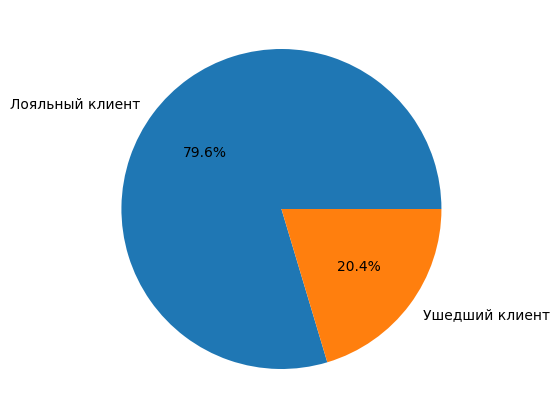

In [45]:
# заменяем цифры 1 и 0 в столбце Exited на их название
loyal = churn_data['Exited'].apply(lambda x: 'Лояльный клиент' if x == 0 else 'Ушедший клиент')
# подсчитываем число лояльных и ушедших клиентов - чтобы потом построить на этой основе круговую диаграмму
loyal_combination = loyal.value_counts()

# строим круговую диаграмму
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyal_combination, 
    labels=loyal_combination.index,
    autopct='%.1f%%' #отображаем соотношение в процентах
);

## Анализ диаграммы
Лояльных клиентов приблизительно в 4 раза больше, чем ушедших клиентов

# Задание 2 
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Text(0, 0.5, 'Количество клиентов')

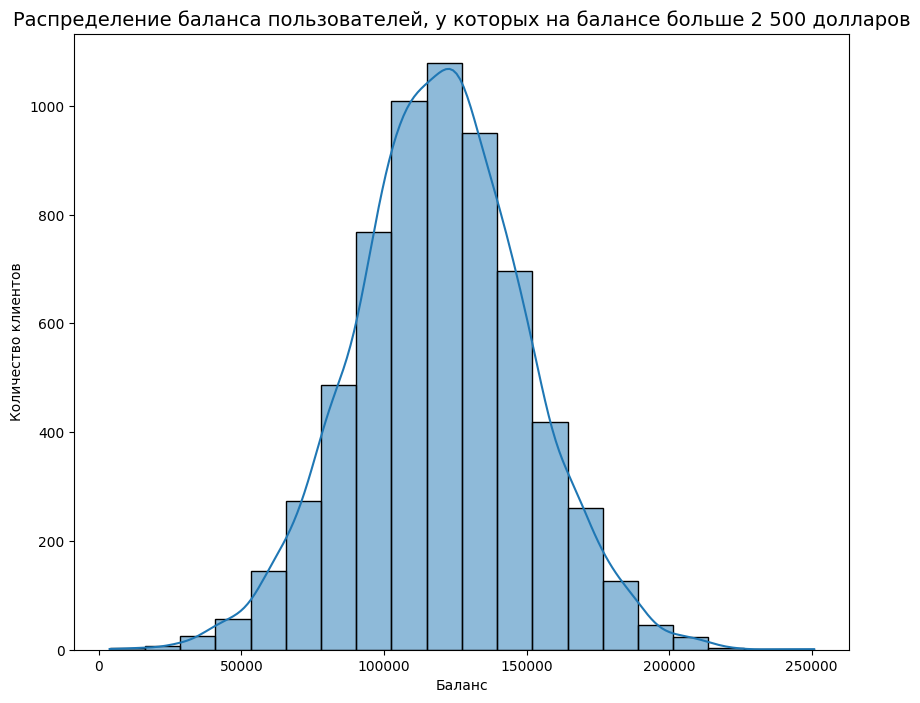

In [168]:
#Отбираем данные только по тем пользователям, у которых на балансе больше 2500
user_balance = churn_data[churn_data['Balance'] > 2500]

#строить будем в библиотеке seaborn
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))

axes.set_title("Распределение баланса пользователей, у которых на балансе больше 2 500 долларов", fontsize = 14)
histplot = sns.histplot(
    data=user_balance,
    x='Balance',
    bins=20,
    kde=True
)
histplot.set_xlabel("Баланс")
histplot.set_ylabel("Количество клиентов")

## Анализ графика

Данные показывают нормальное распределение с пиком количества пользователей с балансом приблизительно в 125 000 долларов

# Задание 3

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

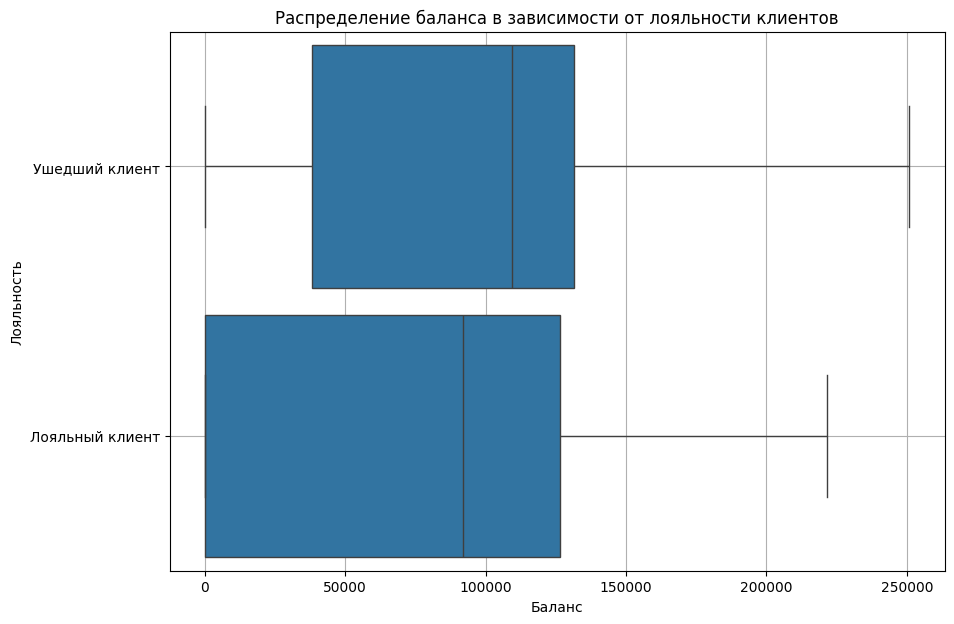

In [47]:
fig = plt.figure(figsize=(10, 7))

#строим коробчатую диаграмму
boxplot = sns.boxplot(
    data=churn_data,
    y=loyal, #здесь данные из признака Exited заменены на: 1 - Лояльный клиент, 0 - Ушедший клиент
    x='Balance', # по оси у откладываем баланс клиентов
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса в зависимости от лояльности клиентов');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

## Анализ графика

Среди лояльных клиентов разброс баланса больше, чем у ушедших клиентов, но при этом на балансе у многих лояльных клиентов меньше средств, чем у ушедших клиентов. Также видно, что медиана баланса у ушедших клиентов больше, чем у лояльных клиентов
Возможно, на отток клиентов влияет то, что они снимают с депозита деньги после того, как добились своих финансовых целей

# Задание 4

Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

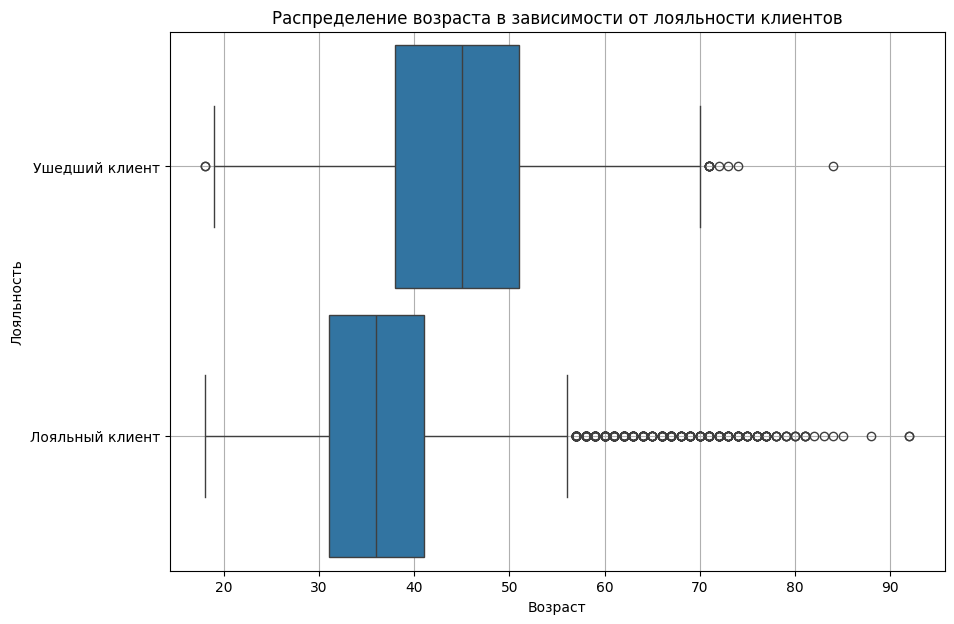

In [48]:
fig = plt.figure(figsize=(10, 7))

#строим коробчатую диаграмму
boxplot = sns.boxplot(
    data=churn_data,
    y=loyal, #здесь данные из признака Exited заменены на: 1 - Лояльный клиент, 0 - Ушедший клиент
    x='Age', # по оси у откладываем возраст клиентов
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение возраста в зависимости от лояльности клиентов');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

## Анализ графика

Потенциальных выбросов больше в группе лояльных клиентов. Можно заметить, что ушедшие клиенты в среднем старше, чем лояльные клиенты. Банку следует обратить внимание на возрастную группу 30-40, потому что именно в ней больше вероятность, что клиент будет лояльным

# Задание 5

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

Text(0, 0.5, 'Предполагаемая зарплата')

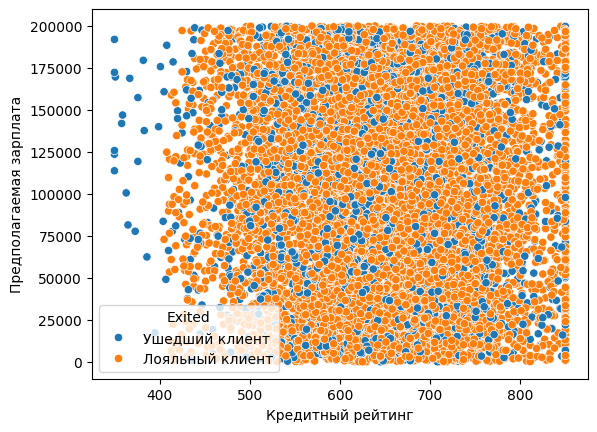

In [167]:
#Построим диаграмму рассеяния
scatterplot = sns.scatterplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue=loyal
)
scatterplot.set_xlabel("Кредитный рейтинг")
scatterplot.set_ylabel("Предполагаемая зарплата")

## Анализ графика

Судя по всему, никакой взаимосвязи между кредитным рейтингом и предполагаемой зарплатой нет. Из графика только можно увидеть, что лояльных клиентов больше, чем ушедших, и что ушедшие клиенты встречаются с более низким кредитным рейтингом, чем лояльные (но таких клиентов очень мало)

# Задание 6

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [66]:
#посчитаем процент ушедших мужчин и ушедших женщин
gone_men = round(churn_data[churn_data['Gender'] == 'Male']['Exited'].mean() * 100, 2)
gone_women = round(churn_data[churn_data['Gender'] == 'Female']['Exited'].mean() * 100, 2)

# сделаем заготовку данных для круговой диаграммы
data_men = pd.DataFrame({'What':['Лояльные мужчины', 'Ушедшие мужчины'], 
        'Procent':[100-gone_men, gone_men]})
data_women = pd.DataFrame({'What':['Лояльные женщины', 'Ушедшие женщины'], 
        'Procent':[100-gone_women, gone_women]})


([<matplotlib.patches.Wedge at 0x7fd220a0eeb0>,
 [Text(-0.776105077423181, 0.7795260796137345, 'Лояльные женщины'),
  Text(0.7761050774231809, -0.7795260796137347, 'Ушедшие женщины')],
 [Text(-0.423330042230826, 0.42519604342567335, '74.9%'),
  Text(0.4233300422308259, -0.4251960434256734, '25.1%')])

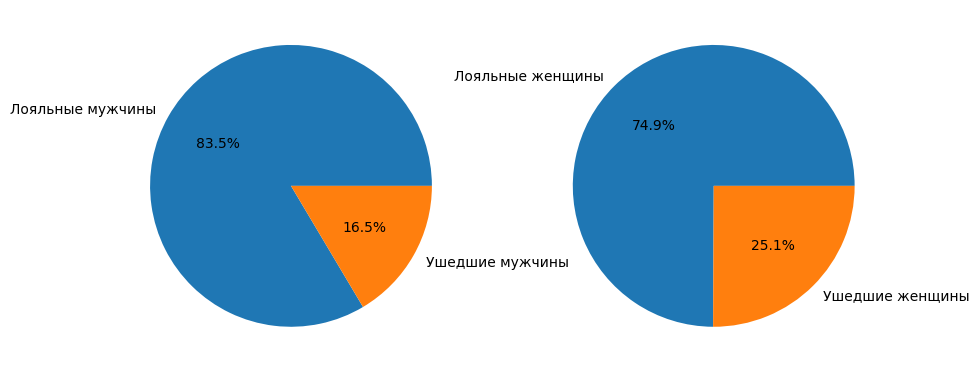

In [65]:
# нарисуем две круговых диаграммы
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
# диаграмма для мужчин
axes[0].pie(
    data_men['Procent'],
    labels=data_men['What'],
    autopct='%.1f%%'
)
#диаграмма для женщин
axes[1].pie(
    data_women['Procent'],
    labels=data_women['What'],
    autopct='%.1f%%'
)

# Анализ графика

Видно, что женщины уходят чаще, чем мужчины

# Задание 7

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

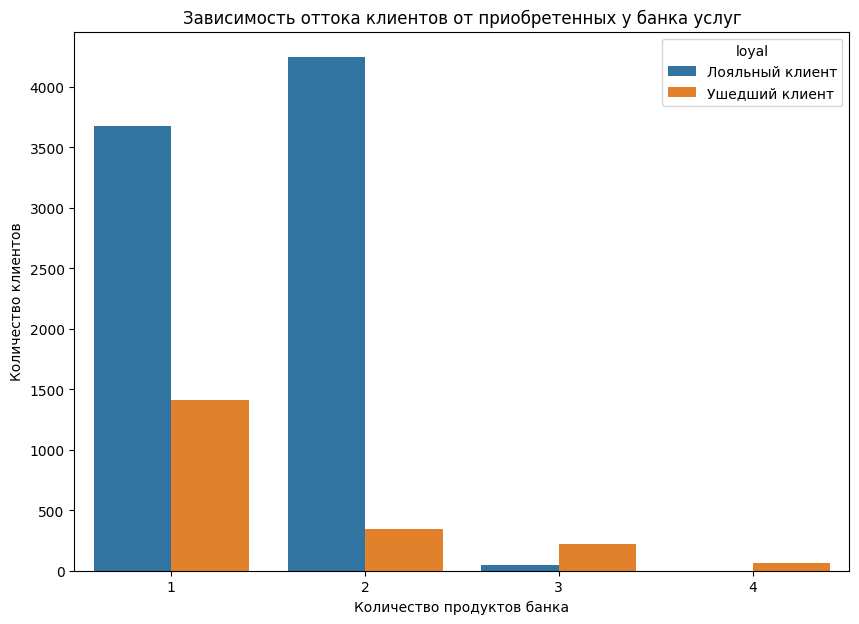

In [164]:
#Выберем количество клиентов для каждого количества продуктов в разрезе лояльности
customer = churn_data.groupby(['NumOfProducts', 'Exited'])['CustomerId'].nunique()
#превратим в датафрейм и сделаем столбец индекса колонкой
customer = pd.DataFrame(customer)
customer = customer.reset_index()
#добавим колонку, расшифровывающую 1 и 0 в столбце лояльности
customer['loyal'] = customer['Exited'].apply(lambda x: 'Лояльный клиент' if x == 0 else 'Ушедший клиент')

#рисуем диаграмму
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=customer, #источник данных
    x='NumOfProducts', # по оси х - количество продуктов у клиента
    y='CustomerId', # по оси у - количество клиентов с таким числом продуктов
    hue='loyal', #разбиваем по признаку лояльности
)
barplot.set_xlabel("Количество продуктов банка")
barplot.set_ylabel("Количество клиентов")
barplot.set_title('Зависимость оттока клиентов от приобретенных у банка услуг');

## Анализ графика

Соотношение лояльных клиентов к ушедшим самое лучшее у тех клиентов, у которых 2 продукта. В целом, количество ушедших клиентов уменьшается с увеличением количества продуктов у клиента, однако и общее количество клиентов, использующих 3 или 4 продукта, очень невелико по сравнению с количеством клиентов, использующих 2 продукта

# Задание 8

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

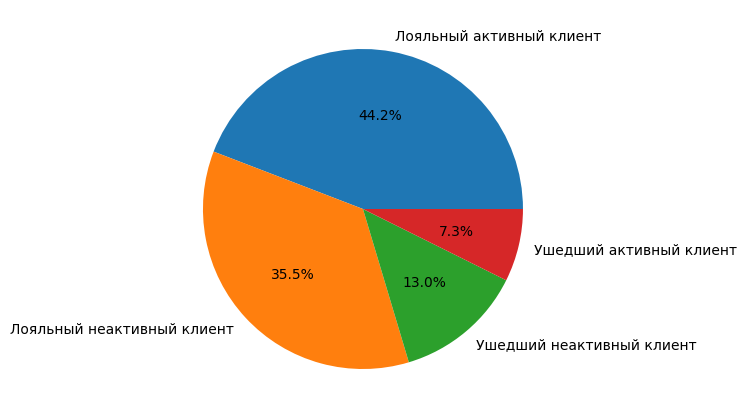

In [88]:
def find_status(x, y):
    if x == 0 and y == 1:
        return "Лояльный активный клиент"
    elif x == 0 and y == 0:
        return "Лояльный неактивный клиент"
    elif x == 1 and y == 1:
        return "Ушедший активный клиент"
    else:
        return "Ушедший неактивный клиент"
    
    
#Разделяем клиентов на лояльных активных, лояльных неактивных, ушедших активных и ушедших неактивных
loyal_active = churn_data.apply(lambda x: find_status(x.Exited, x.IsActiveMember), axis=1)
# подсчитываем число лояльных и ушедших клиентов - чтобы потом построить на этой основе круговую диаграмму
loyal_active_combination = loyal_active.value_counts()

# строим круговую диаграмму
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyal_active_combination, 
    labels=loyal_active_combination.index,
    autopct='%.1f%%' #отображаем соотношение в процентах
);

## Анализ графика

Видно, что неактивных лояльных клиентов несколько меньше, чем активных лояльных; в случае с ушедшими клиентами зависимость обратная. Чтобы уменьшить отток неактивных клиентов, банк может вовлекать их в активность с помощью маркетинговых ходов (например, предложить какой-то новый продукт, или устроить лотерею)

# Задание 9

В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [89]:
import plotly
import plotly.express as px

In [149]:
#Подсчитываем долю ушедших клиентов в каждой из имеющихся стран
countries_ex = churn_data[churn_data['Exited'] == 1]['Geography'].value_counts()
countries_ok = churn_data['Geography'].value_counts()
countries = countries_ex / countries_ok * 100
#превращаем объект Series в DataFrame
countries = pd.DataFrame(countries)
#превращаем индекс в отдельную колонку
countries = countries.reset_index()


In [163]:
#строим график



fig = px.choropleth(
    data_frame=countries, #датафрейм
    locations='Geography', #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    color='count', #от чего зависит цвет
    title='Процент ушедших клиентов', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

fig.show()

## Анализ графика

Больший процент ушедших клиентов в Германии. По текущим данным никаких причин этому не могу придумать, кроме того, что Германия - самая северная страна из имеющихся

# Задание 10

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

```python
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
```
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [158]:
#функция превращения признака в категориальный
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
   
# добавляем столбец, описывающий категорию клиента 
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

In [159]:
#составляем сводную таблицу
pivot = churn_data.pivot_table(
    values='Exited', #значения в ячейках таблицы - доля ушедших клиентов
    columns='Tenure', # столбцы таблицы - количество лет, в течение которых клиент пользуется услугами банка
    index='CreditScoreCat', #строки - тип клиента
    aggfunc='mean' #аггрегирующая функция, считающая долю ушедших клиентов
)

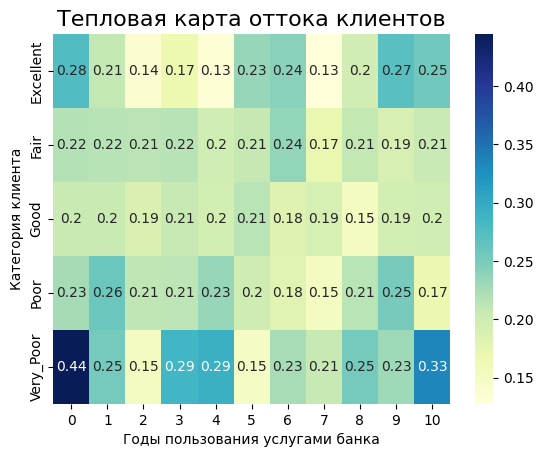

In [162]:
#строим тепловую карту по таблице, включаем параметр "аннотация"
heatmap = sns.heatmap(data=pivot, annot=True, cmap='YlGnBu')
heatmap.set_xlabel("Годы пользования услугами банка")
heatmap.set_ylabel("Категория клиента")
heatmap.set_title('Тепловая карта оттока клиентов', fontsize=16);


## Анализ графика

Чаще всего уходят клиенты из категории Very_Poor